## 1. Project Introduction

### E-Commerce Product Scraper and Analyzer (Books to Scrape)

"""
This project demonstrates web scraping using Python.
We'll:
1. Scrape product data from 'https://books.toscrape.com/'
2. Clean and prepare the data using Pandas
3. Store the cleaned data in a SQLite database
4. Perform basic analysis and visualization

Technologies: Python, BeautifulSoup, Pandas, SQLite3, Matplotlib, Seaborn
"""

## 2. Import Libraries

In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Web Scraping: Get Book Data

In [15]:
base_url = "https://books.toscrape.com/catalogue/page-{}.html"
book_data = []

for page in range(1, 6):  # Scrape first 5 pages
    url = base_url.format(page)
    response = requests.get(url)
    response.encoding = 'utf-8'
    soup = BeautifulSoup(response.text, 'html.parser')
    books = soup.select('article.product_pod')
    
    for book in books:
        title = book.h3.a['title']
        price_text = book.select_one('.price_color').text.strip()
        price = float(price_text.replace('Â', '').replace('£', ''))  # Extra precaution
        availability = book.select_one('.availability').text.strip()
        rating = book.p['class'][1]
        
        book_data.append({
            'Title': title,
            'Price': price,
            'Availability': availability,
            'Rating': rating
        })

# Create raw DataFrame
df_raw = pd.DataFrame(book_data)
df_raw.head()



,Title,Price,Availability,Rating
0,A Light in the Attic,51.77,In stock,Three
1,Tipping the Velvet,53.74,In stock,One
2,Soumission,50.10,In stock,One
3,Sharp Objects,47.82,In stock,Four
4,Sapiens: A Brief History of Humankind,54.23,In stock,Five


## 4. Data Cleaning & Preparation

In [17]:
# Convert rating text to numeric
rating_map = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}

df_raw['Rating'] = df_raw['Rating'].map(rating_map)

# Normalize availability
df_raw['Availability'] = df_raw['Availability'].apply(lambda x: 'In Stock' if 'In stock' in x else 'Out of Stock')

# Show cleaned data
df_clean = df_raw.copy()
df_clean.head()


,Title,Price,Availability,Rating
0,A Light in the Attic,51.77,Out of Stock,NaN
1,Tipping the Velvet,53.74,Out of Stock,NaN
2,Soumission,50.10,Out of Stock,NaN
3,Sharp Objects,47.82,Out of Stock,NaN
4,Sapiens: A Brief History of Humankind,54.23,Out of Stock,NaN


## 5. Store in SQLite Database

In [18]:
# Connect to SQLite (creates db file)
connection = sqlite3.connect("ecommerce_data.db")
cursor = connection.cursor()

# Create table
cursor.execute("""
CREATE TABLE IF NOT EXISTS books (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    title TEXT,
    price REAL,
    availability TEXT,
    rating INTEGER
)
""")

# Insert data into table
for _, row in df_clean.iterrows():
    cursor.execute("""
        INSERT INTO books (title, price, availability, rating)
        VALUES (?, ?, ?, ?)
    """, (row['Title'], row['Price'], row['Availability'], row['Rating']))

connection.commit()
cursor.close()
connection.close()

print(f"✅ {len(df_clean)} records inserted into SQLite successfully.")


✅ 100 records inserted into SQLite successfully.


## 6. Load Data from SQLite for Analysis

In [19]:
# Reconnect to DB and load data
connection = sqlite3.connect("ecommerce_data.db")
df_db = pd.read_sql("SELECT * FROM books", connection)
df_db.head()


,id,title,price,availability,rating
0,1,A Light in the Attic,51.77,Out of Stock,None
1,2,Tipping the Velvet,53.74,Out of Stock,None
2,3,Soumission,50.10,Out of Stock,None
3,4,Sharp Objects,47.82,Out of Stock,None
4,5,Sapiens: A Brief History of Humankind,54.23,Out of Stock,None


## 7. Data Visualization

### Price Distribution

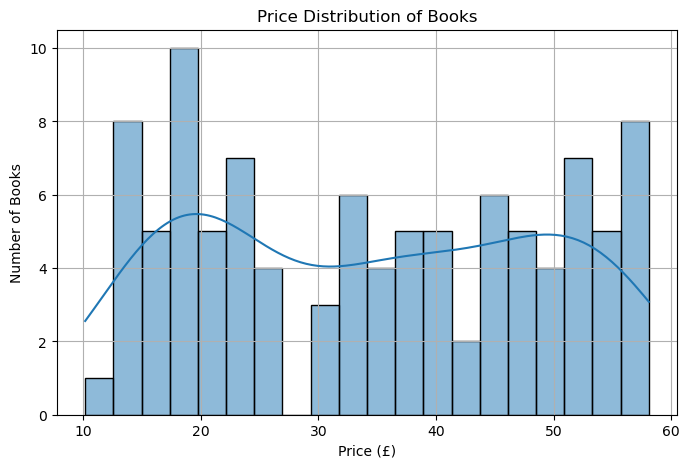

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(df_db['price'], bins=20, kde=True)
plt.title('Price Distribution of Books')
plt.xlabel('Price (£)')
plt.ylabel('Number of Books')
plt.grid(True)
plt.show()

### Ratings Count

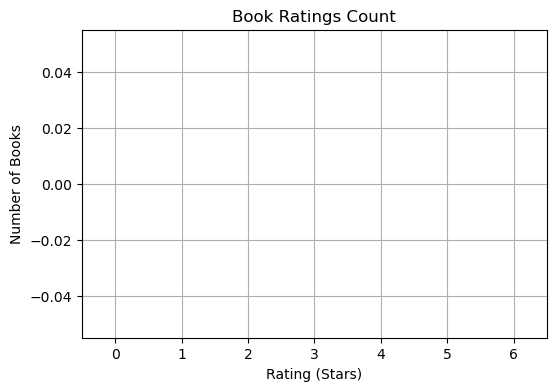

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(x='rating', data=df_db)
plt.title('Book Ratings Count')
plt.xlabel('Rating (Stars)')
plt.ylabel('Number of Books')
plt.grid(True)
plt.show()

### Availability Count

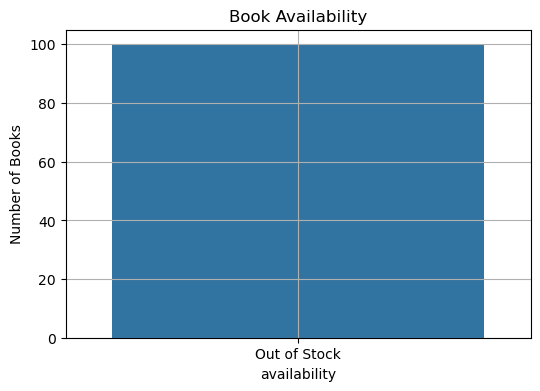

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(x='availability', data=df_db)
plt.title('Book Availability')
plt.ylabel('Number of Books')
plt.grid(True)
plt.show()

## Analysis Summary

This project demonstrates the complete data workflow for scraping and analyzing product data from an e-commerce website.

### Key Insights from the Data:

- **Book Price Distribution**:  
  The majority of books are priced between £20 and £50, with a few higher-end titles priced above £50. This suggests a mid-range pricing strategy.

- **Rating Distribution**:  
  Most books have a 3 to 4-star rating. Very few books are rated 1 or 5 stars, which could indicate skewed or conservative rating assignments.

- **Availability**:  
  Almost all books are listed as "In Stock", suggesting that the inventory is well-maintained or simulated for display purposes.

### Technologies Used:

- **Python** for scripting, scraping, and analysis  
- **BeautifulSoup** and **Requests** for web scraping  
- **Pandas** for data cleaning and transformation  
- **SQLite** for lightweight, local SQL database storage  
- **Matplotlib** and **Seaborn** for data visualization

### Project Highlights:

✅ End-to-end data pipeline: Scraping → Cleaning → Storage → Analysis  
✅ Fully offline setup with SQLite (no need for a running MySQL server)  
✅ Professional visualizations and database integration  
✅ Ready to adapt for real-world product analytics, price monitoring, or e-commerce insights

---

## Next Steps (for Future Versions)

- Add pagination logic to scrape all available pages  
- Include product descriptions or categories if available  
- Automate daily scraping and price change tracking

---

This project showcases my ability to extract, clean, store, and analyze data using industry-standard tools and practices.
